In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

#Typical plot parameters that make for pretty plots
mpl.rcParams['figure.figsize'] = (9,8)
mpl.rcParams['font.size'] = 20.0

## for Palatino and other serif fonts use:
mpl.rc('font',**{'family':'serif'})

In [2]:
data = pd.read_csv("census2000.csv")

In [3]:
data.head()

,Sex,Year,Age,People
0,1,1900,0,4619544
1,1,2000,0,9735380
2,1,1900,5,4465783
3,1,2000,5,10552146
4,1,1900,10,4057669


In [4]:
# Split dataset into year, sex bins
grouped = data.groupby(["Year","Sex"])

initialMale = grouped.get_group((1900,1))
finalMale = grouped.get_group((2000,1))

# Split dataset into year, sex bins
initialFemale = grouped.get_group((1900,2))
finalFemale = grouped.get_group((2000,2))

# Compute sex ratios
initialRatio = initialMale["People"].values/initialFemale["People"].values
finalRatio = finalMale["People"].values/finalFemale["People"].values

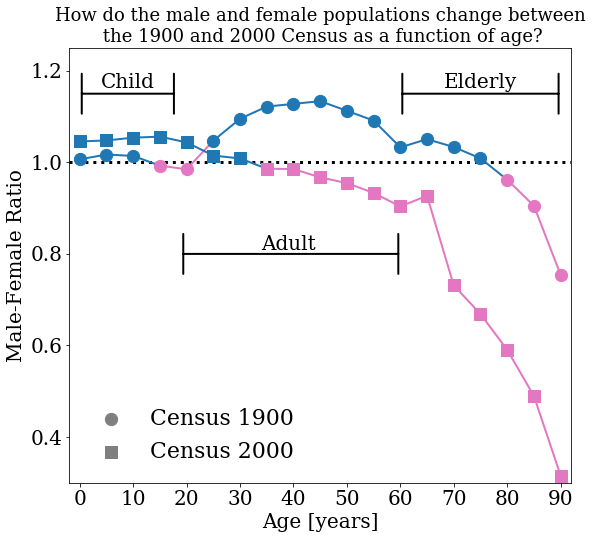

In [5]:
fig, ax = plt.subplots()

# Find positive (male-dominated) ratios
initialAbove = initialRatio >= 1.0
finalAbove = finalRatio >= 1.0

# 1900 Census
points = np.array([initialMale["Age"].values, initialRatio]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
cmap = ListedColormap(["C6", "C0"])
norm = BoundaryNorm([0, 1, 2], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(initialRatio)
lc.set_linewidth(2)
ax.add_collection(lc)

#ax.plot(initialMale["Age"], initialRatio, ls="-", zorder=0, lw=2, color="C7")
ax.scatter(initialMale["Age"][initialAbove], initialRatio[initialAbove], color="C0", zorder=10, 
           s=150)
ax.scatter(initialMale["Age"][~initialAbove], initialRatio[~initialAbove], color="C6", zorder=10, 
           s=150)

# 2000 Census
points = np.array([finalMale["Age"].values, finalRatio]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(finalRatio)
lc.set_linewidth(2)
ax.add_collection(lc)

#ax.plot(finalMale["Age"], finalRatio, ls="-", zorder=0, lw=2, color="C7")
ax.scatter(finalMale["Age"][finalAbove], finalRatio[finalAbove], color="C0", zorder=10, 
           s=150, marker="s")
ax.scatter(finalMale["Age"][~finalAbove], finalRatio[~finalAbove], color="C6", zorder=10, 
           s=150, marker="s")

# Unity line
ax.axhline(1, lw=3, ls=":", color="k", zorder=0)

# For the legend
ax.scatter([100],[100], marker="o", color="C7", s=150, label="Census 1900")
ax.scatter([100],[100], marker="s", color="C7", s=150, label="Census 2000")

# Annotations for child, adult, elderly
ax.text(9, 1.175, "Child", ha="center", va="center", size=20, color="k",
          bbox=dict(boxstyle="square", fc="w", ec="none"))
ax.annotate(s="", xy=(0,1.15), xytext=(18,1.15), 
               arrowprops=dict(arrowstyle="|-|", color="k", lw=2))

ax.text(39, 0.82, "Adult", ha="center", va="center", size=20, color="k",
          bbox=dict(boxstyle="square", fc="w", ec="none"))
ax.annotate(s="", xy=(19,0.8), xytext=(60,0.8), 
               arrowprops=dict(arrowstyle="|-|", color="k", lw=2))

ax.text(75, 1.175, "Elderly", ha="center", va="center", size=20, color="k",
          bbox=dict(boxstyle="square", fc="w", ec="none"))
ax.annotate(s="", xy=(60,1.15), xytext=(90,1.15), 
               arrowprops=dict(arrowstyle="|-|", color="k", lw=2))

# Format
ax.legend(loc="lower left", fontsize=22, framealpha=0)
ax.set_xlim(-2,92)
ax.set_ylim(0.3,1.25)
ax.xaxis.set_ticks([0,10,20,30,40,50,60,70,80,90])
ax.set_ylabel("Male-Female Ratio")
ax.set_xlabel("Age [years]")
ax.set_title("How do the male and female populations change between\n the 1900 and 2000 Census as a function of age?",
             fontsize=18)

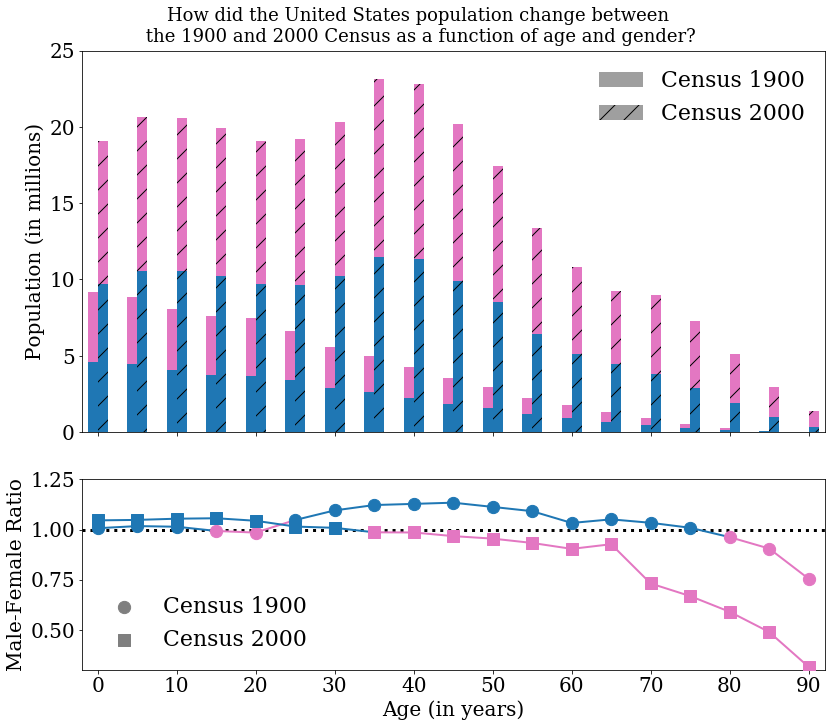

In [6]:
fig, axes = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [2, 1]},
                         figsize=(12, 10))

### Top panel ###

ind = initialMale["Age"].values
width = 1.25
scale = 1.0e6

# Plot initial values
axes[0].bar(ind - width/2, initialMale["People"].values/scale, width, color="C0")
axes[0].bar(ind - width/2, initialFemale["People"].values/scale, width, 
            bottom=initialMale["People"].values/scale, color="C6")

# Plot final values
axes[0].bar(ind + width/2, finalMale["People"].values/scale, width, color="C0", hatch="/")
axes[0].bar(ind + width/2, finalFemale["People"].values/scale, width, 
            bottom=finalMale["People"].values/scale, color="C6", hatch="/")

# For the legend
axes[0].bar([100],[100], color="C7", hatch="", alpha=0.75, label="Census 1900")
axes[0].bar([100],[100], color="C7", hatch="/", alpha=0.75, label="Census 2000")

# Format
axes[0].legend(loc="upper right", fontsize=22, framealpha=0)
axes[0].set_xlim(-2,92)
axes[0].set_ylim(0,25)
axes[0].xaxis.set_ticks([0,10,20,30,40,50,60,70,80,90])
axes[0].set_ylabel("Population (in millions)")

### Bottom panel ###

# Find positive (male-dominated) ratios
initialAbove = initialRatio >= 1.0
finalAbove = finalRatio >= 1.0

# 1900 Census
points = np.array([initialMale["Age"].values, initialRatio]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
cmap = ListedColormap(["C6", "C0"])
norm = BoundaryNorm([0, 1, 2], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(initialRatio)
lc.set_linewidth(2)
axes[1].add_collection(lc)

axes[1].scatter(initialMale["Age"][initialAbove], initialRatio[initialAbove], color="C0", zorder=10, 
                s=150)
axes[1].scatter(initialMale["Age"][~initialAbove], initialRatio[~initialAbove], color="C6", zorder=10, 
                s=150)

# 2000 Census
points = np.array([finalMale["Age"].values, finalRatio]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(finalRatio)
lc.set_linewidth(2)
axes[1].add_collection(lc)

axes[1].scatter(finalMale["Age"][finalAbove], finalRatio[finalAbove], color="C0", zorder=10, 
                s=150, marker="s")
axes[1].scatter(finalMale["Age"][~finalAbove], finalRatio[~finalAbove], color="C6", zorder=10, 
                s=150, marker="s")

# Unity line
axes[1].axhline(1, lw=3, ls=":", color="k", zorder=0)

# For the legend
axes[1].scatter([100],[100], marker="o", color="C7", s=150, label="Census 1900")
axes[1].scatter([100],[100], marker="s", color="C7", s=150, label="Census 2000")

# Format
axes[1].legend(loc="lower left", fontsize=22, framealpha=0)
axes[1].set_xlim(-2,92)
axes[1].set_ylim(0.3,1.25)
axes[1].xaxis.set_ticks([0,10,20,30,40,50,60,70,80,90])
axes[1].set_ylabel("Male-Female Ratio")
axes[1].set_xlabel("Age (in years)")

# Figure formating
fig.suptitle("How did the United States population change between\n the 1900 and 2000 Census as a function of age and gender?",
             fontsize=18, y=1.02)
fig.tight_layout()

fig.savefig("dflemin3_a1.png", bbox_inches="tight")